In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler

C:\Users\takea\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_data = pd.read_csv(r"C:\Users\takea\Desktop\DeepLearning\datasets\week8\DailyDelhiClimateTrain.csv")
test_data =  pd.read_csv(r"C:\Users\takea\Desktop\DeepLearning\datasets\week8\DailyDelhiClimateTest.csv")

In [3]:
train_data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
train_data.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [5]:
dfx = train_data[['humidity', 'wind_speed', 'meanpressure']]
dfy = train_data[['meantemp']]

In [6]:
dfx.describe()

,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000
mean,60.771702,6.802209,1011.104548
std,16.769652,4.561602,180.231668
min,13.428571,0.000000,-3.041667
25%,50.375000,3.475000,1001.580357
50%,62.625000,6.221667,1008.563492
75%,72.218750,9.238235,1014.944901
max,100.000000,42.220000,7679.333333


In [7]:
dfy.describe()

,meantemp
count,1462.000000
mean,25.495521
std,7.348103
min,6.000000
25%,18.857143
50%,27.714286
75%,31.305804
max,38.714286


In [10]:
idx_Label = []
valid_Month = [1, 4, 7, 10]
for i in range(len(dfy)):
    date = train_data['date'][i]
    year, month, day = date.split('-')
    if int(month) in valid_Month :
        if day == '01' :
            idx_Label.append(date)
        else:
            idx_Label.append('')
    else:
        idx_Label.append('')

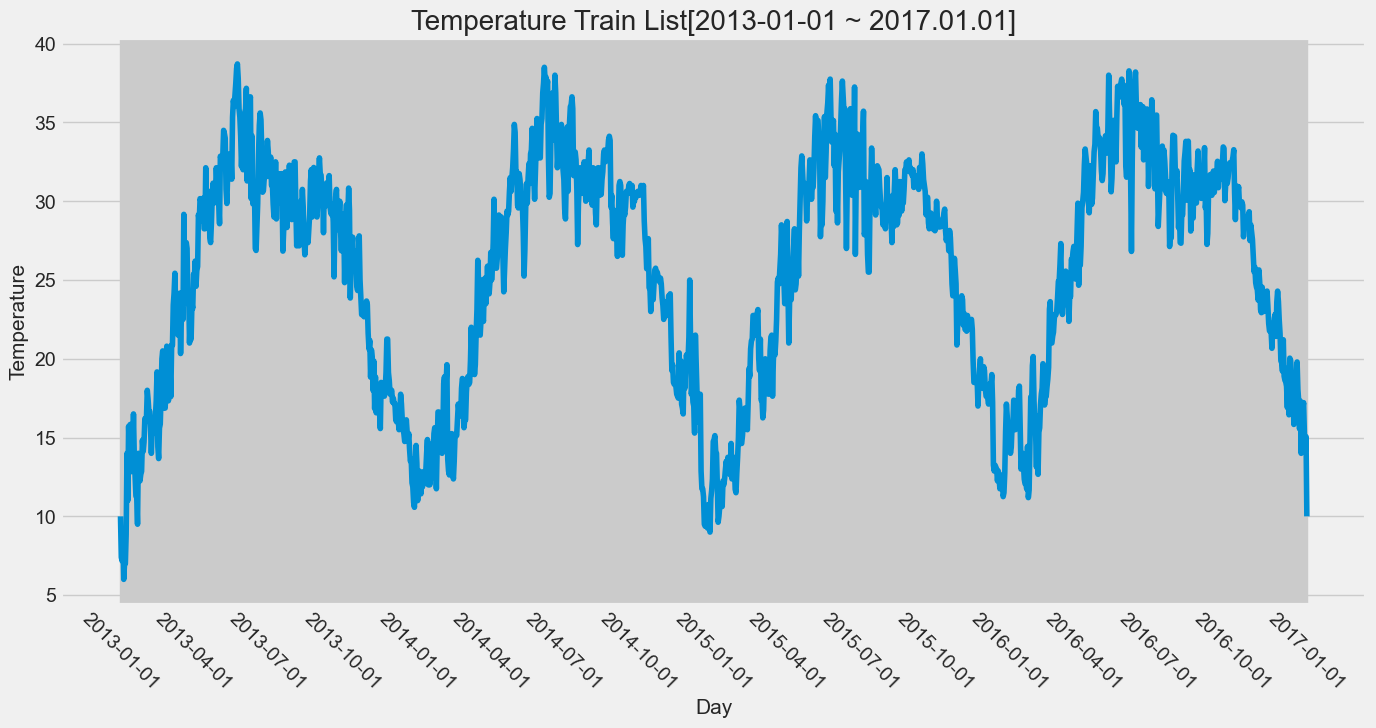

In [11]:
plt.figure(figsize=(15, 7))

plt.title('Temperature Train List[2013-01-01 ~ 2017.01.01]', fontsize = 20)
plt.xlabel('Day', fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)

idx_List = list(range(len(dfy)))

plt.plot(idx_List, dfy)
plt.xticks(idx_List, labels = idx_Label, rotation = -45)
plt.show()

In [12]:
# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()

In [13]:
window_size = 20

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size]
    _y = y[i + window_size]
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[63.86363636363637, 3.2818181818181817, 1014.181818181818], [62.35, 3.4300000000000006, 1015.1], [58.61111111111112, 8.027777777777775, 1017.3333333333334], [56.625, 9.879166666666666, 1016.6666666666666], [63.27777777777778, 3.9166666666666674, 1018.7777777777778], [63.388888888888886, 6.731578947368422, 1016.9473684210526], [64.54166666666667, 6.420833333333331, 1018.0833333333334], [56.095238095238095, 10.414285714285716, 1017.4285714285714], [48.53333333333333, 15.926666666666671, 1015.2], [54.3, 19.40476190476191, 1015.6190476190476], [57.85714285714285, 6.1809523809523785, 1016.1428571428572], [74.7, 1.205, 1014.25], [78.63636363636364, 5.236363636363636, 1011.318181818182], [94.3, 9.085, 1014.35], [74.85714285714286, 8.784210526315787, 1016.952380952381], [67.55, 8.335, 1017.2], [68.04347826086956, 3.547826086956522, 1015.5652173913044], [87.85714285714286, 6.0, 1016.904761904762], [89.66666666666667, 6.266666666666667, 1017.904761904762], [87.0, 7.325, 1016.1]] -> [10.0]


In [14]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 1442 1442


In [15]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (1009, 20, 3) (1009, 1)
테스트 데이터의 크기 : (433, 20, 3) (433, 1)


In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [18]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(20, 3)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 20, 20)            1920      
                                                                 
 dropout (Dropout)           (None, 20, 20)            0         
                                                                 
 lstm_2 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 5221 (20.39 KB)
Trainable params: 5221 (20.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
34/34 [==============================] - 4s 15ms/step - loss: 24071.7227
Epoch 2/70
34/34 [==============================] - 1s 19ms/step - loss: 42106.0156
Epoch 3/70
34/34 [==============================] - 1s 21ms/step - loss: 9875.7314
Epoch 4/70
34/34 [==============================] - 1s 20ms/step - loss: 5035.4233
Epoch 5/70
34/34 [==============================] - 1s 20ms/step - loss: 5678.5181
Epoch 6/70
34/34 [==============================] - 1s 17ms/step - loss: 4865.8359
Epoch 7/70
34/34 [==============================] - 1s 22ms/step - loss: 7398.7217
Epoch 8/70
34/34 [==============================] - 1s 20ms/step - loss: 6876.7036
Epoch 9/70
34/34 [==============================] - 1s 16ms/step - loss: 4886.9614
Epoch 10/70
34/34 [==============================] - 1s 17ms/step - loss: 7006.5322
Epoch 11/70
34/34 [==============================] - 1s 19ms/step - loss: 6252.9136
Epoch 12/70
34/34 [==============================] - 1s 18ms/step - loss: 3065.5427

In [20]:
model.evaluate(test_X, test_y)

14/14 [==============================] - 1s 6ms/step - loss: 426.3689


426.3689270019531

14/14 [==============================] - 0s 5ms/step


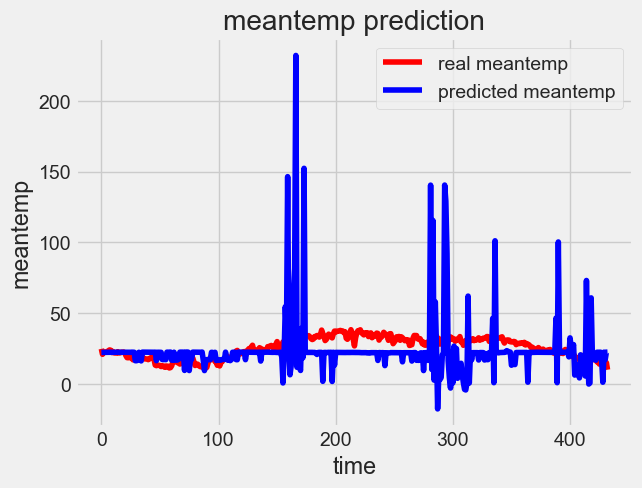

In [22]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real meantemp')
plt.plot(pred_y, color='blue', label='predicted meantemp')
plt.title('meantemp prediction')
plt.xlabel('time')
plt.ylabel('meantemp')
plt.legend()
plt.show()